# Narración de historias con datos

También conocido como *data storytelling*. Una historia en el contexto de ciencia de datos es una narrativa acerca de lo que encontraste, cómo lo encontraste y qué significa. Un ejemplo podría ser el descubrimiento de que la ganancia de tu empresa cayó un 20% en el último año. No es suficiente exponer ese hecho — tenés que comunicar por qué la ganancia cayó y cómo se podría solucionar.

Las componenetes principales de las historias con datos son:

* Entendimiento/establecimiento del contexto
* Múltiples puntos de vista
* Visualizaciones explicativas
* Fuentes de datos varias
* Narrativa consistente

*Fuente*: https://www.dataquest.io/blog/data-science-portfolio-project

Algunos consejos...

1. **Empezar con una pregunta**: Plantear la historia.
1. **Terminar con un descubrimiento**: Si no conseguimos nada útil de los datos, entonces no vale la pena contar la historia.
1. **Contar una historia irresistible**: Recordamos las historias, no los datos. Llevar a la audiencia de paseo.
1. **Explicar con visuales, narrar con palabras**: Entendemos métricas, tendencias y patrones mejor con visuales. Usar las palabras para darle voz a los datos.
1. **Ser honesto y creíble**: No conducir la narrativa con datos parciales.
1. **Ser claro y conciso**: Remover todo lo que no sea parte de la historia; salvar lo que sobre para un próximo trabajo.
1. **Adaptarse a la audiencia**: Tener en cuenta sus intereses. ¿Prefieren los detalles o una visión por arriba?
1. **Proveer contexto**: Fuera de contexto, los números no tienen significado. Hacer comparaciones temporales y/o con otros resultados.

*Fuente*: https://twooctobers.com/blog/8-data-storytelling-concepts-with-examples

Es conveniente estructurar las historias de la misma manera que se estructuran las publicaciones científicas.

1. **Contexto**: ¿Qué motivó este análisis?, ¿cuál es la pregunta que estamos intentando responder?. Señalar trabajos previos relacionados.

2. **Metodología**: Registrar la metodología usada. Si se eligió alguna en particular por sobre otras, explicar la elección. Ser transparente con los alcances y limitaciones de la metodología y en cómo impacta esto en la precisión y confiabilidad de los resultados.

3. **Resultados**: Realizar el análisis de una manera repetible. Adherir a estádares estadísticos apropiados; registrar todas las instancias de cumplimiento e incumplimiento de los datos con tales estándares.

4. **Discusión**: Obtener críticas y revisión de pares cuando sea posible. Comparar los resultados con trabajos previos. Ser transparente cuando las conclusiones no se obtienen directamente de los resultados (especulaciones).

5. **Conclusiones**: Comunicar de forma concisa las conclusiones sólidas. Donde haya incertezas, presentarlas como fuente de futuras investigaciones.

*Fuente*: https://towardsdatascience.com/beware-of-storytelling-with-data-1710fea554b0

Esta guía nos puede ayudar a elegir las visualizaciones correctas en función de nuestos datos.

![](visualizaciones.png)

In [9]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sn

%matplotlib inline

* Uso básico
* Cargar/salvar datos en CSV, Excel, bases de datos
* Agrupamientos y operaciones sobre grupos
* Series temporales
* Visualizaciones

![title](introduccion-al-pensamiento-nacional.jpg)

1. Pregunta

El análisis de datos debe estar asociado a una pregunta. La narrativa viene después de conseguir los resultados; deben estar validados, hay que señalar las debilidades del análisis. Querer plantear una narrativa antes del análisis introduce un sesgo.
2. Datasets
3. Importar datos

### Harvard

WorldMap > GREG (Geo-referencing of Ethnic Groups)

https://worldmap.harvard.edu/data/geonode:GREG_0vV

In [35]:
wm = gpd.read_file('greg/GREG_0vV.shp', encoding='utf8')
wm.head()

,FIPS_CNTRY,G1ID,G1SHORTNAM,geometry
0,AA,312,Curaçao Islanders,POLYGON ((-69.88223266601561 12.41110992431638...
1,AC,354,English-speaking population of the Lesser Anti...,(POLYGON ((-61.73889160156249 17.5405540466308...
2,AF,117,Baloch,"POLYGON ((64.03937259487208 30.02452980633303,..."
3,AF,898,Persians,"POLYGON ((61.75455746794267 30.78628187799154,..."
4,AF,12,Afghans,"POLYGON ((61.6228546696016 31.39535837664602, ..."


### PRIO

PRIO > Economic and Socio-Demographic Data > Ethnic Composition Data

https://www.prio.org/Data/Economic-and-Socio-Demographic/Ethnic-Composition-Data/

In [34]:
#!pip install savReaderWriter

In [86]:
from savReaderWriter import SavReader

with SavReader('prio/Etnisk.sav') as reader:
    # los nombres de las columnas vienen en bytes, hay que decodificarlos
    header = [name.decode() for name in reader.header]
    
    prio = pd.DataFrame(data=reader.all(), columns=header)
    
    # el contenido de la columna "name" también es tipo bytes
    prio.name = prio.name.str.decode(encoding='utf8', errors='ignore')

In [93]:
prio.columns

Index(['ssno', 'year', 'name', 'v01a', 'v02a', 'v03a', 'v04a', 'v05a', 'v06a',
       'v07a', 'v08a', 'v09a', 'v10a', 'v11a', 'v12a', 'v13a', 'v14a', 'v15a',
       'v01b', 'v02b', 'v03b', 'v04b', 'v05b', 'v06b', 'v07b', 'v08b', 'v09b',
       'v10b', 'v11b', 'v12b', 'v13b', 'v14b', 'v15b', 'v01c', 'v02c', 'v03c',
       'v04c', 'v05c', 'v06c', 'v07c', 'v08c', 'v09c', 'v10c', 'v11c', 'v12c',
       'v13c', 'v14c', 'v15c', 'v01d', 'v02d', 'v03d', 'v04d', 'v05d',
       'gsstrel', 'alstreln', 'gsnstrel', 'alnsreln', 'gsantrel', 'gsstetn',
       'alstetnn', 'gsnstetn', 'alnsetnn', 'gsantetn'],
      dtype='object')

In [ ]:
prio[]

In [49]:
cols = """
v01D: LARGEST LINGUISTIC GROUP (AS % OF TOTAL POPULATION)
v02D: LARGEST LINGUISTIC GROUP (NAME)
v03D: SECOND LARGEST LINGUISTIC GROUP (AS % OF TOTAL POPULATION)
v04D: SECOND LARGEST LINGUISTIC GROUP (NAME)
v05D: NUMBER OF LINGUISTIC GROUPS
v06D: LARGEST RELIGIOUS GROUP (AS % OF TOTAL POPULATION)
v07D: LARGEST RELIGIOUS GROUP (NAME)
v08D: SECOND LARGEST RELIGIOUS GROUP (AS % OF TOTAL POPULATION)
v09D: SECOND LARGEST RELIGIOUS GROUP (NAME)
v10D: NUMBER OF RELIGIOUS GROUPS 
v11D: LARGEST ETHNIC GROUP (AS % OF TOTAL POPULATION)
v12D: LARGEST ETHNIC GROUP (NAME)
v13D: SECOND LARGEST ETHNIC GROUP (AS % OF TOTAL POPULATION)
v14D: SECOND LARGEST ETHNIC GROUP (NAME)
v15D: NUMBER OF ETHNIC GROUPS
""".split('\n')

### Otros (no usados)

+ https://web.stanford.edu/group/ethnic/publicdata/publicdata.html
* http://www.columbia.edu/~aw2951/Datasets.html
* https://icr.ethz.ch/data/

### Norwegian Centre for Research Data

MacroDataGuide > Fractionalization Data

https://nsd.no/macrodataguide/set.html?id=16&sub=1

https://www.anderson.ucla.edu/faculty_pages/romain.wacziarg/downloads/2003_fractionalization.xls

In [39]:
#!pip install xlrd

In [92]:
mdg = pd.read_excel('2003_fractionalization.xls', header=5, sheet_name=1)
mdg.head()

,Source,Date,Country,Group,Percent,Ethnic,Comments
0,wdm,1995,Afghanistan,Pashtuns,30.000000,0.769345,NaN
1,wdm,1995,Afghanistan,Tajiks,30.000000,NaN,NaN
2,wdm,1995,Afghanistan,Hazara,16.000000,NaN,NaN
3,wdm,1995,Afghanistan,"Turkmens, Uzbeks",13.000000,NaN,NaN
4,wdm,1995,Afghanistan,Koochis,8.858407,NaN,NaN


In [94]:
mdg = mdg[['Country','Group','Percent']].copy()

In [126]:
mdg_max = mdg.sort_values(by='Percent', ascending=False).groupby('Country').apply(lambda x: x.head(2).reset_index(drop=True))
mdg_max.head(8)

Country      Group  Percent
Country                                       
Afghanistan 0  Afghanistan   Pashtuns     30.0
            1  Afghanistan     Tajiks     30.0
Albania     0      Albania  Albanians     88.1
            1      Albania     Greeks      4.0
Algeria     0      Algeria       Arab     80.0
            1      Algeria     Kabyle     13.0
Andorra     0      Andorra    Spanish     44.4
            1      Andorra   Andorran     20.2

In [129]:
mdg_max = mdg_max.unstack(level=-1).drop(columns='Country').round()

Group                        Percent      
                                        0                      1       0     1
Country                                                                       
Afghanistan                      Pashtuns                 Tajiks    30.0  30.0
Albania                         Albanians                 Greeks    88.0   4.0
Algeria                              Arab                 Kabyle    80.0  13.0
Andorra                           Spanish               Andorran    44.0  20.0
Angola                          Ovimbundu                 Mbundu    37.0  22.0
Antigua and Barbuda                 Black                  Mixed    91.0   4.0
Argentina                        European                Mestizo    85.0  15.0
Armenia                          Armenian          Other Armenia    93.0   4.0
Australia                           White             Aboriginal    95.0   2.0
Austria                 Western Europeans      Eastern Europeans    94.0   4.0
Azerbaijan                    Azerbaijani       Other Azerbaijan    89.0   4.0
Bahamas                 African Bahamians               Haitians    74.0  14.0
Bahrain                              Arab                  Asian    64.0  30.0
Bangladesh                        Bengali                 Chakmi    98.0   0.0
Barbados                            Black                  White    92.0   3.0
Belarus                      Byelorussian                Russian    81.0  11.0
Belgium                           Fleming                Walloon    58.0  31.0
Belize                            Mestizo                 Creole    44.0  30.0
Benin                                 Fon                 Yoruba    40.0  12.0
Bhutan                             Bhutia      Nepalese (Gurung)    50.0  35.0
Bolivia                            Aymara                Quechua    30.0  30.0
Bosnia and Herzegovina            Bosniak                   Serb    49.0  31.0
Botswana                           Tswana                  Shona    76.0  12.0
Brazil                              White                  Mixed    54.0  40.0
Brunei                             Malays                Chinese    64.0  20.0
Bulgaria                       Bulgarians                  Turks    76.0  10.0
Burkina Faso                        Mossi                  Mande    48.0   9.0
Burundi                              Hutu                  Tutsi    83.0  14.0
Cambodia                            Khmer             Vietnamese    89.0   6.0
Cameroon                             Fang        Bamileke/ Bamum    20.0  18.0
...                                   ...                    ...     ...   ...
Swaziland                         African               European    97.0   3.0
Sweden                  Western Europeans  Others (Africa, Asia)    97.0   1.0
Switzerland                        German                 French    65.0  18.0
Syria                               Sunni                 Alawis    66.0  11.0
Taiwan                          Taiwanese                Chinese    84.0  14.0
Tajikistan                          Tajik                  Uzbek    65.0  25.0
Tanzania                                8                      1    42.0  26.0
Thailand                          Siamese                    Lao    53.0  27.0
Togo                                    1                      2    43.0  27.0
Tonga                                   1                      2    96.0   3.0
Trinidad and Tobago           East Indian                  Black    40.0  40.0
Tunisia                              Arab          Tunisia Other    98.0   1.0
Turkey                            Turkish                Kurdish    80.0  20.0
Turkmenistan                      Turkmen                  Uzbek    77.0   9.0
Tuvalu                           Tuvaluan                  Mixed    91.0   7.0
Uganda                              Ganda                   Teso    18.0   9.0
Ukraine                         Ukrainian                Russian    65.0  33.0
United 

In [157]:
mdg.Country.unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia',
       'Cameroon', 'Canada', 'Cape Verde', 'Central African Republic',
       'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus',
       'Czech Republic', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Equat. Guinea', 'Eritrea', 'Estonia', 'Ethiopia', 'Fiji',
       'Finland', 'France', 'Gabon', 'Gambia (The)', 'Georgia', 'Germany',
       'Ghana', 'Greece', 'Grenada', 'Guatemala', 'Guinea',
       'Guinea-Bissau', 'Guyana', 'Haiti', 'Honduras', 'Hong Kong',


### Naciones Unidas

UNdata > United Nations Statistics Division > Demographic Statistics Database > Population by national and/or ethnic group, sex and urban/rural residence

http://data.un.org/Data.aspx?d=POP&f=tableCode%3a26

In [2]:
pop = pd.read_csv('UNdata_Export_20190508_130150845.zip')
pop.head()

,Country or Area,Year,Area,Sex,National and/or ethnic group,Record Type,Reliability,Source Year,Value,Value Footnotes
0,Åland Islands,2000,Total,Both Sexes,Total,Census - de jure - complete tabulation,"Final figure, complete",2009.0,25776.0,1
1,Åland Islands,2000,Total,Both Sexes,Finnish,Census - de jure - complete tabulation,"Final figure, complete",2009.0,5109.0,1
2,Åland Islands,2000,Total,Both Sexes,Swedish,Census - de jure - complete tabulation,"Final figure, complete",2009.0,1354.0,1
3,Åland Islands,2000,Total,Both Sexes,Other,Census - de jure - complete tabulation,"Final figure, complete",2009.0,552.0,1
4,Åland Islands,2000,Total,Both Sexes,Åland,Census - de jure - complete tabulation,"Final figure, complete",2009.0,18682.0,1


In [3]:
# Hay notas al pie al final de la tabla que arruinan la importación de datos.
# Las notas se pueden quitar editando el archivo pero lo hacemos con Pandas.
pop = pop.iloc[:-81].copy()

In [4]:
últimos_censos = pop.groupby('Country or Area')['Year'].max()

pop = pd.merge(pop, últimos_censos.reset_index(), on=['Country or Area', 'Year'])

In [5]:
# está separado por sexo y también agregado
s = pop['Sex'] == 'Both Sexes'

# no queremos el agregado
n = pop['National and/or ethnic group'] != 'Total'

# está dividida en rural y urbana
a = pop['Area'] == 'Total'

# seleccionamos columnas y filas de interés
pop = pop[s & n & a][['Country or Area', 'National and/or ethnic group', 'Value']]

In [6]:
pop['Country or Area'].unique()

array(['Åland Islands', 'Albania', 'American Samoa', 'Anguilla',
       'Antigua and Barbuda', 'Armenia', 'Aruba', 'Australia',
       'Azerbaijan', 'Bahrain', 'Barbados', 'Belarus', 'Belize',
       'Bermuda', 'Bolivia (Plurinational State of)', 'Brazil',
       'British Virgin Islands', 'Brunei Darussalam', 'Bulgaria',
       'Canada', 'Chile', 'China', 'China, Hong Kong SAR',
       'China, Macao SAR', 'Colombia', 'Cook Islands', 'Costa Rica',
       'Croatia', 'Cuba', 'Czechia', 'Dominica', 'Ecuador', 'Egypt',
       'El Salvador', 'Estonia', 'Ethiopia',
       'Falkland Islands (Malvinas)', 'Fiji', 'Georgia', 'Ghana',
       'Gibraltar', 'Grenada', 'Guam', 'Hungary', 'Indonesia',
       'Iran (Islamic Republic of)', 'Ireland', 'Isle of Man', 'Jamaica',
       'Kazakhstan', 'Kenya', 'Kiribati', 'Kuwait', 'Kyrgyzstan',
       "Lao People's Democratic Republic", 'Latvia', 'Liberia',
       'Lithuania', 'Malaysia', 'Micronesia (Federated States of)',
       'Monaco', 'Mongolia', 'Mont

In [69]:
len(pop['National and/or ethnic group'].unique())

1324

In [73]:
pop_max = pop.sort_values(by='Value', ascending=False).groupby('Country or Area').head(1)
pop_max.head()

,Country or Area,National and/or ethnic group,Value
6076,China,Han,1.220845e+09
20956,Venezuela (Bolivarian Republic of),Indigenous,2.722793e+08
20804,United States of America,White,2.235533e+08
15801,Russian Federation,Russian,1.110169e+08
9231,Indonesia,Jawa,9.521702e+07


No es un dataset agradable, tiene pocos países/territorios con nombres a veces extraños, con nombres de grupos étnicos también dispares, donde influye mucho la nacionalidad y no tanto otros razgos culturales como la religión y el lenguaje.

---

UNdata > United Nations Statistics Division > National Accounts Estimates of Main Aggregates > Per capita GDP at current prices - US dollars

http://data.un.org/Data.aspx?q=GDP&d=SNAAMA&f=grID%3a101%3bcurrID%3aUSD%3bpcFlag%3a1

In [7]:
gdp = pd.read_csv('UNdata_Export_20190508_182127808.zip')
gdp.head()

,Country or Area,Year,Item,Value
0,Afghanistan,2017,Gross Domestic Product (GDP),618.989990
1,Afghanistan,2016,Gross Domestic Product (GDP),583.883061
2,Afghanistan,2015,Gross Domestic Product (GDP),610.854545
3,Afghanistan,2014,Gross Domestic Product (GDP),651.158426
4,Afghanistan,2013,Gross Domestic Product (GDP),681.034215


In [8]:
gpd = gdp[['Country or Area', 'Year', 'Value']]
gdp['Country or Area'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia (Plurinational State of)',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon',
       'Canada', 'Cayman Islands', 'Central African Republic', 'Chad',
       'Chile', 'China, Hong Kong SAR',
       'China, Macao Special Administrative Region',
       "China, People's Republic of", 'Colombia', 'Comoros', 'Congo',
       'Cook Islands', 'Costa Rica', "Côte d'Ivoire", 'Croatia', 'Cuba',
       'Curaçao', 'Cyprus', 'Czechia',
       "Democratic People's Republic of Korea",
       'Democratic Republic of the Congo', 'Denmark', 'Djibouti',
  

In [20]:
gdp_10y_mean = gdp[gdp.Year.between(2007,2017)].groupby('Country or Area').Value.mean().round()
gdp_10y_mean.head()

Country or Area
Afghanistan      571.0
Albania         4172.0
Algeria         4661.0
Andorra        41297.0
Angola          4200.0
Name: Value, dtype: float64

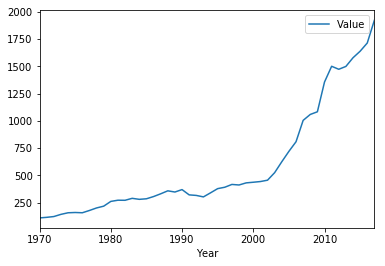

In [11]:
gdp[gdp['Country or Area'] == 'India'].plot(x='Year', y='Value');

### ICOW

![title](icow.png)

In [39]:
# devuelve una lista de DataFrame por eso nos quedamos con el primer (y único) elemento
df = pd.read_html('https://www.paulhensel.org/icownames.html', header=0, index_col='Num')[0]
df.head()

,Name,Alternative Spellings / Names / Related Entities,Primary Colonial Ruler,Capital(s) since 1800,Adjective(s)
Num,,,,,
2,United States of America,US/U.S./United States; USA/U.S.A.,200 UK,Washington D.C.,American
20,Canada,British possessions: British North AmericaFren...,200 UK,"Ottawa (Kingston 1841-1843, Montreal 1843-1849...",Canadian
31,Bahamas,Bahama Islands; Lucayos,200 UK,Nassau,"Bahaman, Bahamian"
40,Cuba,(None),230 Spain,Havana,Cuban
41,Haiti,Ayiti (native); Hayti; Saint-Domingue,220 France,Port-au-Prince,Haitian


In [40]:
df['Primary Colonial Ruler'].unique()

array(['200 UK', '230 Spain', '220 France', '210 Netherlands',
       '235 Portugal', '(none)', '255 Germany', '300 Austria-Hungary',
       '640 Ottoman Empire', '365 Russia', '211 Belgium', '325 Italy',
       '710 China', '740 Japan', '900 Australia', '2 USA',
       '920 New Zealand'], dtype=object)

In [58]:
uk = df[df['Primary Colonial Ruler'] == '200 UK'].copy().Name
uk.head()

Num
2     United States of America
20                      Canada
31                     Bahamas
51                     Jamaica
52         Trinidad and Tobago
Name: Name, dtype: object

In [59]:
aux = pd.merge(uk, gdp_10y_mean, left_on='Name', right_index=True, how='left')
aux.head()

,Name,Value
Num,,
2,United States of America,NaN
20,Canada,46876.0
31,Bahamas,28904.0
51,Jamaica,4879.0
52,Trinidad and Tobago,17911.0


In [60]:
aux[aux.Value.isnull()]

,Name,Value
Num,,
2,United States of America,NaN
57,Saint Vincent and Grenadines,NaN
510,Tanzania,NaN
511,Zanzibar,NaN
572,eSwatini,NaN
680,Yemen People's Republic,NaN
781,Maldive Islands,NaN
835,Brunei,NaN


In [61]:
uk[  2] = 'United States'
uk[ 57] = 'Saint Vincent and the Grenadines'
uk[510] = 'United Republic of Tanzania: Mainland'
uk[511] = 'United Republic of Tanzania: Zanzibar'
uk[572] = 'Swaziland'
uk[680] = 'Yemen'
uk[781] = 'Maldives'
uk[835] = 'Brunei Darussalam'

* 679 Yemen árabe
* 680 Yemen británico

Unificados en 1990.

In [107]:
uk.drop_duplicates(inplace=True)

In [108]:
uk_gdp_10y_mean = pd.merge(uk, gdp_10y_mean, left_on='Name', right_index=True, how='inner')
uk_gdp_10y_mean.head()

,Name,Value
Num,,
2,United States,52493.0
20,Canada,46876.0
31,Bahamas,28904.0
51,Jamaica,4879.0
52,Trinidad and Tobago,17911.0


In [109]:
aux = pd.merge(uk_gdp_10y_mean.reset_index(), mdg_max, left_on='Name', right_on='Country', how='left')
aux.head()

,Num,Name,Value,Country,Group,Percent
0,2,United States,52493.0,United States,White,69.132065
1,20,Canada,46876.0,Canada,Other Canada,43.500000
2,31,Bahamas,28904.0,Bahamas,African Bahamians,73.648649
3,51,Jamaica,4879.0,Jamaica,Black,74.700000
4,52,Trinidad and Tobago,17911.0,Trinidad and Tobago,East Indian,40.300000


In [110]:
aux[aux['Country'].isnull()].sort_values(by='Name')

,Num,Name,Value,Country,Group,Percent
50,835,Brunei Darussalam,37409.0,NaN,NaN,NaN
17,420,Gambia,768.0,NaN,NaN,NaN
47,781,Maldives,8124.0,NaN,NaN,NaN
11,60,Saint Kitts and Nevis,14948.0,NaN,NaN,NaN
9,57,Saint Vincent and the Grenadines,6529.0,NaN,NaN,NaN
34,626,South Sudan,1171.0,NaN,NaN,NaN
23,510,United Republic of Tanzania: Mainland,781.0,NaN,NaN,NaN
24,511,United Republic of Tanzania: Zanzibar,727.0,NaN,NaN,NaN
35,679,Yemen,1196.0,NaN,NaN,NaN


In [113]:
mdg_max.Country.sort_values().unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia',
       'Cameroon', 'Canada', 'Cape Verde', 'Central African Republic',
       'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus',
       'Czech Republic', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Equat. Guinea', 'Eritrea', 'Estonia', 'Ethiopia', 'Fiji',
       'Finland', 'France', 'Gabon', 'Gambia (The)', 'Georgia', 'Germany',
       'Ghana', 'Greece', 'Grenada', 'Guatemala', 'Guinea',
       'Guinea-Bissau', 'Guyana', 'Haiti', 'Honduras', 'Hong Kong',


In [115]:
aux.set_index('Num').dropna().drop(columns=['Name']).rename(columns={'Value':'GDP per capita'}).sort_values(by='GDP per capita')

,GDP per capita,Country,Group,Percent
Num,,,,
553,373.0,Malawi,Maravi,50.000000
451,508.0,Sierra Leone,Temne,30.000000
700,571.0,Afghanistan,Pashtuns,30.000000
500,618.0,Uganda,Ganda,17.800000
552,852.0,Zimbabwe,Shona,76.000000
771,939.0,Bangladesh,Bengali,97.700000
775,989.0,Myanmar,Burman,69.000000
570,1124.0,Lesotho,Sotho,85.000000
501,1152.0,Kenya,Kikuyu,22.000000


In [118]:
gdp_10y_mean['Brazil']

10253.0

### merge

![](https://pandas.pydata.org/pandas-docs/stable/_images/merging_merge_on_key.png)

*Fuente*: https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html

### groupby

![](https://jakevdp.github.io/PythonDataScienceHandbook/figures/03.08-split-apply-combine.png)

*Fuente*: https://jakevdp.github.io/PythonDataScienceHandbook

* https://www.theguardian.com/news/datablog/gallery/2014/sep/19/every-single-country-that-has-left-the-united-kingdom-mapped
* https://en.wikipedia.org/wiki/Territorial_evolution_of_the_British_Empire